In [4]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def split_images_cv2_with_highlight(input_folder_path, output_folder_path):
    for image_name in os.listdir(input_folder_path):
        image_path = os.path.join(input_folder_path, image_name)

        if image_name.lower().endswith(('png', 'jpg', 'jpeg')):
            # Đọc ảnh
            image = cv2.imread(image_path)
            if image is None:
                print(f"Không thể đọc ảnh: {image_name}")
                continue

            # Chuyển đổi màu BGR sang RGB
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            height, width, _ = image.shape

            # Xác định vùng giữa theo chiều ngang
            # middle_start = int(width * 0.4)
            # middle_end = int(width * 0.6)

            # # Tạo hình ảnh với lớp màng trong suốt màu đỏ
            # highlight_image = image_rgb.copy()
            # overlay = highlight_image.copy()
            # overlay[:, middle_start:middle_end, :] = (255, 0, 0)  # Màu đỏ
            # alpha = 0.5  # Độ trong suốt
            # highlight_image = cv2.addWeighted(overlay, alpha, highlight_image, 1 - alpha, 0)

            # Sinh tỷ lệ ngẫu nhiên để tách ảnh
            while True:
                left_split_ratio = random.uniform(0.4, 0.8)
                right_split_ratio = random.uniform(0.4, 0.8)
                if left_split_ratio + right_split_ratio >= 1:
                    break

            left_split = int(width * left_split_ratio)
            right_split = int(width * right_split_ratio)

            # Tạo hình ảnh với lớp màng trong suốt màu đỏ
            highlight_image = image_rgb.copy()
            overlay = highlight_image.copy()
            overlay[:, left_split:right_split, :] = (255, 0, 0)  # Màu đỏ
            alpha = 0.7  # Độ trong suốt
            highlight_image = cv2.addWeighted(overlay, alpha, highlight_image, 1 - alpha, 0)

            # Tách ảnh
            left_image = image[:, :left_split]
            right_image = image[:, width - right_split:]

            # Chuyển đổi màu để hiển thị
            left_image_rgb = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
            right_image_rgb = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)
        

            # Hiển thị các bước xử lý
            fig, axes = plt.subplots(2, 2, figsize=(12, 12))
            axes[0, 0].imshow(image_rgb)
            axes[0, 0].set_title("Ảnh gốc")
            axes[0, 0].axis("off")

            axes[0, 1].imshow(highlight_image)
            axes[0, 1].set_title("Ảnh gốc với vùng overlap")
            axes[0, 1].axis("off")

            axes[1, 0].imshow(left_image_rgb)
            axes[1, 0].set_title("Ảnh bên trái")
            axes[1, 0].axis("off")

            axes[1, 1].imshow(right_image_rgb)
            axes[1, 1].set_title("Ảnh bên phải")
            axes[1, 1].axis("off")

            plt.tight_layout()
            plt.savefig("data.png")
            plt.show()

            # Tạo thư mục con dựa trên tên ảnh
            base_name = os.path.splitext(image_name)[0]
            output_folder = os.path.join(output_folder_path, base_name)
            os.makedirs(output_folder, exist_ok=True)

            # Lưu ảnh đã tách
            left_image_path = os.path.join(output_folder, f"{base_name}_left.png")
            right_image_path = os.path.join(output_folder, f"{base_name}_right.png")

            cv2.imwrite(left_image_path, left_image_rgb)
            cv2.imwrite(right_image_path, right_image_rgb)

            print(f"Đã tách và lưu ảnh: {image_name}")

    print("Hoàn thành xử lý tất cả ảnh.")


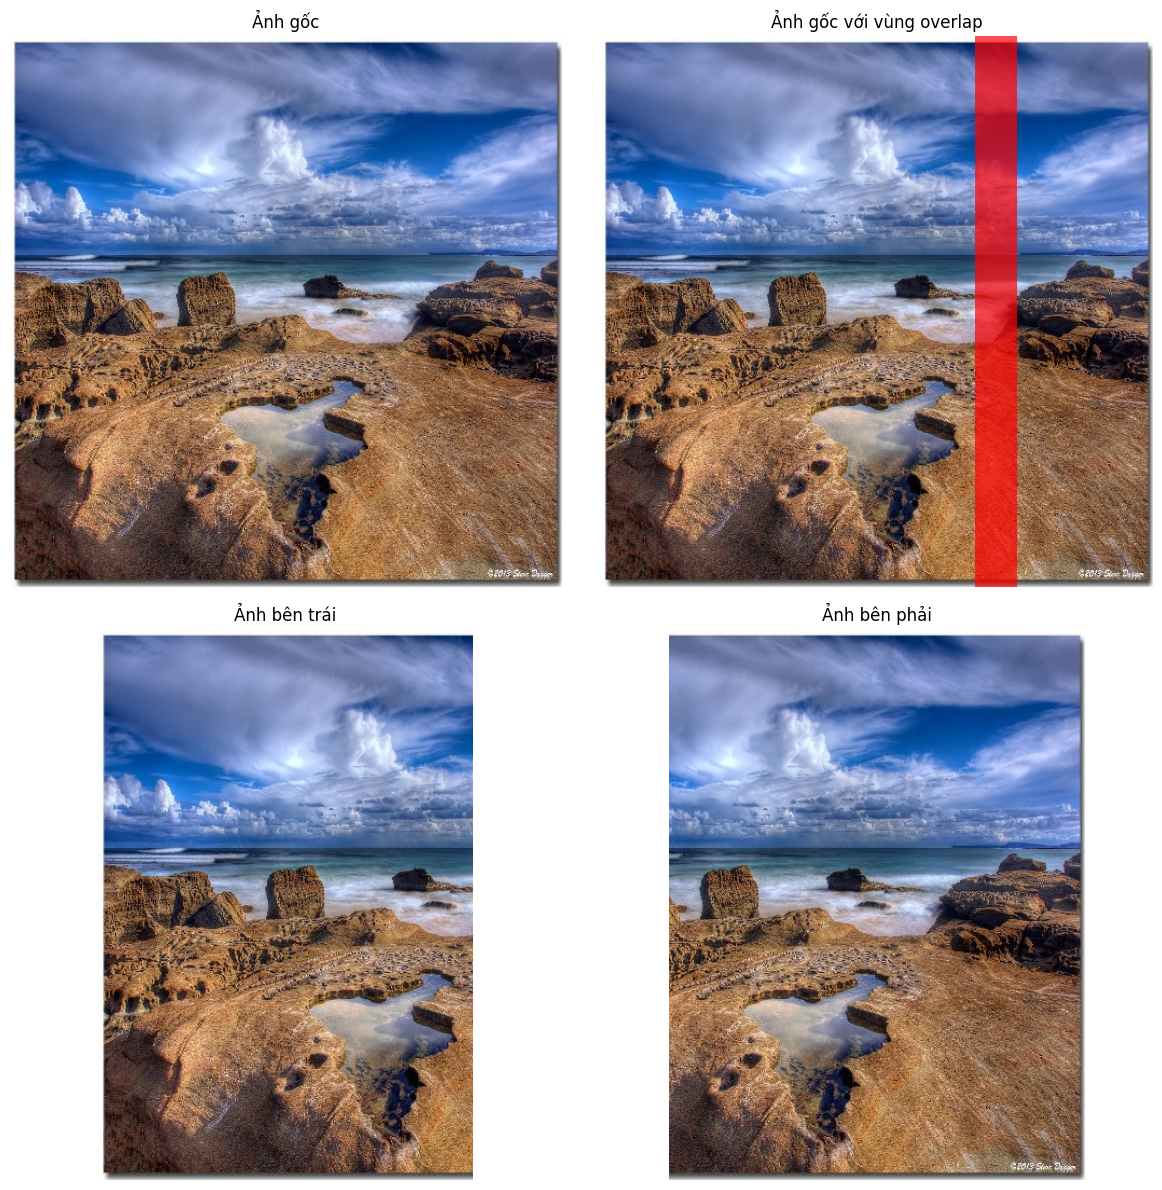

Đã tách và lưu ảnh: 00000001_(5).jpg
Hoàn thành xử lý tất cả ảnh.


In [25]:
input_folder_path = 'C:/Users/OS/Desktop/cv/data2/raw'
output_folder_path = 'C:/Users/OS/Desktop/cv/data2/split'
split_images_cv2_with_highlight(input_folder_path, output_folder_path)
